In [1]:
import pandas as pd
pd.set_option("display.max_columns", 100)
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Optional, Any, Union

CSV_DATA = Path().cwd().parent.parent / "data/2_loaded"

In [2]:
# Load the summary  for reference later
df_summary = pd.read_csv(CSV_DATA/'summary/ride_summary_good.csv')
df_summary['start_date'] = pd.to_datetime(df_summary['start_date'])
df_summary['year'] = df_summary['start_date'].dt.year
df_summary['month'] = df_summary['start_date'].dt.month
df_summary['month_name'] = df_summary['start_date'].dt.month_name()
df_summary['start_time'] = pd.to_timedelta(df_summary['start_time'])
df_summary['end_time'] = pd.to_timedelta(df_summary['end_time'])

## Handle categorical variables
month_order = {'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}
df_summary['month_name'] = pd.Categorical(df_summary['month_name'] , categories=month_order.keys(), ordered=True)

In [3]:
df_summary24 = df_summary.loc[df_summary['year']==2024].reset_index(drop=True)
df_summary24.head(10)

,ride_id,start_date,start_time,end_time,biker_weight_lbs,bike_weight,bag_weight,avg_speed,avg_cruising_speed,total_ride_time_sec,total_moving_time_sec,total_distance_mi,total_ascent_ft,total_descent_ft,avg_heart_rate,avg_power,avg_cadence,avg_ambient_temp_F,best_power_4s,best_power_5s,best_power_10s,best_power_20s,best_power_30s,best_power_1m,best_power_2m,best_power_3m,best_power_4m,best_power_5m,best_power_6m,best_power_10m,best_power_20m,best_power_30m,best_power_40m,best_power_1h,best_power_2h,year,month,month_name
0,0x65bfd8be,2024-02-04,0 days 18:34:38,0 days 19:28:53,220,25,0,9.527357,12.342948,3256.0,2351.0,8.458264,187.6732,279.5412,115.555538,65.028793,NaN,78.103880,310.255589,308.123565,291.439272,255.712946,235.955278,195.692452,147.293070,137.515048,132.528701,133.569889,131.174928,123.819794,100.665176,85.945107,80.512619,NaN,NaN,2024,2,February
1,0x65cbcb8d,2024-02-13,0 days 20:05:33,0 days 20:51:03,220,25,0,10.363345,13.050481,2731.0,1756.0,6.834804,242.7940,242.7940,NaN,81.952892,NaN,NaN,354.250825,351.659801,324.016790,269.726666,242.969958,209.420901,184.329614,149.468923,134.825479,127.061890,123.451692,117.591013,106.189645,94.502171,NaN,NaN,NaN,2024,2,February
2,0x661c5dfa,2024-04-14,0 days 22:51:38,0 days 23:14:49,220,25,0,5.725683,10.515063,1392.0,675.0,2.148722,225.7328,219.1708,117.258697,64.042326,NaN,85.496373,621.616926,613.770179,557.898004,423.739887,340.487773,271.976950,185.269449,139.440852,138.451007,137.619784,124.446161,96.657370,70.645655,NaN,NaN,NaN,NaN,2024,4,April
3,0x661ff649,2024-04-17,0 days 16:18:17,0 days 18:26:22,220,25,0,7.142026,12.506619,7686.0,3072.0,12.225232,1375.3952,1339.3042,144.480039,87.020642,NaN,83.411587,1170.473521,1158.334870,1073.148701,825.049190,596.478742,414.423510,361.223633,277.179928,217.968068,205.941190,201.338120,167.342438,153.785987,132.428478,113.835832,107.662383,NaN,2024,4,April
4,0x663a3144,2024-05-07,0 days 13:48:52,0 days 16:32:57,220,25,0,12.223941,14.645619,5280246.0,8762.0,35.946595,562.3634,547.9270,136.719535,99.213123,NaN,83.772700,342.918232,340.783854,318.812139,264.332044,235.599506,190.750307,175.318029,170.242772,163.004630,157.527646,154.944776,142.513938,130.809078,128.724365,124.516872,117.253850,105.76314,2024,5,May
5,0x663c00a2,2024-05-08,0 days 22:45:54,0 days 23:55:29,220,25,0,8.652486,10.287778,4176.0,2246.0,7.471199,657.1843,656.5281,NaN,89.754090,NaN,NaN,531.334783,525.811247,494.637429,426.247806,381.974504,328.935914,285.543303,245.595262,231.205603,245.508425,234.585140,171.447654,127.023064,109.203417,101.833759,NaN,NaN,2024,5,May
6,0x66452ebc,2024-05-15,0 days 21:53:00,0 days 23:24:13,220,25,0,12.071955,13.298839,5474.0,3455.0,13.192520,300.2115,299.2272,NaN,91.809308,NaN,NaN,538.578938,535.168991,513.367014,455.593648,406.180150,307.453199,208.742520,174.692446,148.241910,139.734390,139.086289,134.153966,108.388087,100.131336,95.667646,94.087060,NaN,2024,5,May
7,0x6647e479,2024-05-17,0 days 23:12:57,0 days 00:55:30,220,25,0,14.820830,15.589168,6154.0,3493.0,15.286096,262.1519,262.1519,NaN,130.205369,NaN,NaN,483.336974,474.137319,417.844343,322.169952,286.297521,267.139890,240.650760,238.074818,229.369084,209.055920,208.271654,200.659436,184.131321,163.012482,144.401665,131.524576,NaN,2024,5,May
8,0x6653585c,2024-05-26,0 days 15:42:20,0 days 16:10:25,220,25,0,10.272558,11.997267,1686.0,1038.0,3.707279,346.1455,345.4893,NaN,122.349943,NaN,NaN,601.359216,600.134853,591.879950,569.112684,552.564718,475.708726,368.238988,291.597926,243.445718,228.543115,220.277087,168.737013,132.389125,NaN,NaN,NaN,NaN,2024,5,May
9,0x6657ad77,2024-05-29,0 days 22:34:31,0 days 00:12:31,220,25,0,10.606017,12.403217,5881.0,2356.0,8.791491,683.1042,682.7761,NaN,115.805535,NaN,NaN,744.631330,734.497080,679.351453,541.024407,437.271497,412.277786,358.298343,315.488671,303.259288,263.828504,261.952850,230.578543,157.927507,136.891962,125.807889,NaN,NaN,2024,5,May


In [4]:
RIDE_ID = '0x6647e479'
df_ride1 = pd.read_csv(CSV_DATA / f"{RIDE_ID}.csv")
df_ride1['time'] = pd.to_datetime(df_ride1['time'])
cols_of_interest = ['time','segment_id','delta_dist_ft','delta_ele_ft','filt_grade_saturated','heading']
df_ride1 = df_ride1.loc[df_ride1['delta_dist_ft']!=0.0, cols_of_interest]

In [5]:
df_ride1.tail(10)

,time,segment_id,delta_dist_ft,delta_ele_ft,filt_grade_saturated,heading
3696,2024-05-18 00:55:14+00:00,5.0,10.872626,0.3281,4.214149,12.200469
3697,2024-05-18 00:55:15+00:00,5.0,3.184697,0.3281,4.101355,21.801410
3698,2024-05-18 00:55:16+00:00,5.0,7.368863,0.0000,3.906542,357.797402
3699,2024-05-18 00:55:17+00:00,5.0,3.034910,0.0000,3.633425,343.300756
3700,2024-05-18 00:55:18+00:00,5.0,3.300512,0.3281,3.291366,344.744881
3701,2024-05-18 00:55:19+00:00,5.0,5.411927,0.0000,2.895740,344.475889
3702,2024-05-18 00:55:20+00:00,5.0,4.041008,0.3281,2.472756,333.434949
3703,2024-05-18 00:55:21+00:00,5.0,1.574757,0.0000,2.045874,323.130102
3704,2024-05-18 00:55:22+00:00,5.0,0.364813,0.0000,1.633637,270.000000
3706,2024-05-18 00:55:24+00:00,5.0,0.283070,0.0000,0.900073,180.000000


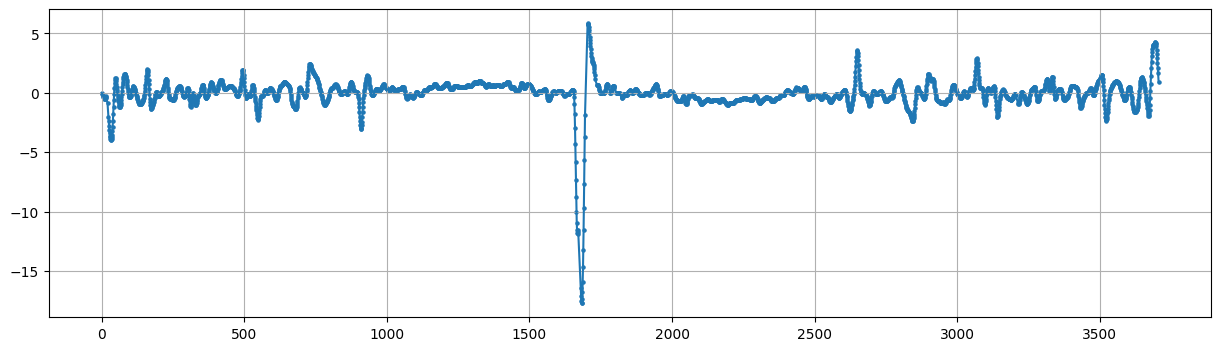

In [6]:
_ = plt.figure(figsize=(15,4))
_ = plt.plot(df_ride1['filt_grade_saturated'])
_ = plt.scatter(df_ride1.index, df_ride1['filt_grade_saturated'], s=5)
_ = plt.grid()

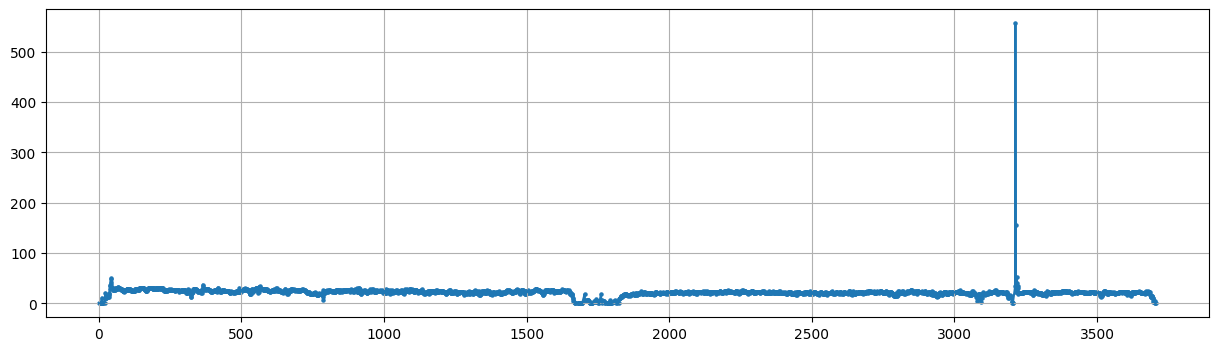

In [7]:
_ = plt.figure(figsize=(15,4))
_ = plt.plot(df_ride1['delta_dist_ft'])
_ = plt.scatter(df_ride1.index, df_ride1['delta_dist_ft'], s=5)
_ = plt.grid()

In [8]:
route_dist_mi = df_ride1['delta_dist_ft'].sum() / 5280.0
target_completion_time = 3600 # 1 hour 
target_completion_time_hr = target_completion_time / 3600.0
const_speed = route_dist_mi / target_completion_time_hr
print(f'This route is "{round(route_dist_mi,2)}" miles long.'+
       f' To complete it in "{round(target_completion_time_hr,2)}" hour(s) means the constant avg speed is "{round(const_speed,2)}" MPH')

This route is "15.29" miles long. To complete it in "1.0" hour(s) means the constant avg speed is "15.29" MPH


In [9]:
df_ride1['speed'] = const_speed

In [10]:
power_params = {'weight': {'rider':220, # needs to be converted lb-->kg
                   'bike':25,
                   'bags':0
                  }, 
                  'area': 0.4635862, # m^2
                  'mu_rr': 0.005, # coefficient of rolling friction
                  'c_drag': 0.95, # coefficient of drag
                  'rho_air': 1.2, # kg/m^3 air density
                  'eta_dt': 0.96, # efficiency of drive train
                  'gravity': 9.8 # m/s^2
                 }

In [11]:
def get_instantaneous_power(df:pd.DataFrame, power_params:dict, total_weight:float,
                            speed_column:str='speed', grade_column:str='filt_grade_saturated'):
    df = df.copy()
    cols_to_drop_later = ['grade_radians','speed_MpS','F_grav','F_fric','F_drag', 'F_sum', 
                        'total_speed']
    params = power_params
    pounds_to_kilograms = 0.453592
    total_mass = pounds_to_kilograms * total_weight

    # Convert the terrain slope into radians
    df['grade_radians'] = np.arctan(df[grade_column]/100)
    
    # Convert the speed units into meters per second
    mph2MpS = 0.44704 # 1 MPH = 0.44704 m/s
    df['speed_MpS'] = mph2MpS * df[speed_column]
    
    # Get the total speed component with wind (placeholder)
    df['total_speed'] = df['speed_MpS']
    
    # Calculate the individual forces
    df['F_grav'] = total_mass*params['gravity'] * np.sin(df['grade_radians'])
    df['F_fric'] = params['mu_rr']*total_mass*params['gravity'] * np.cos(df['grade_radians'])
    full_coefficient = 0.5 * params['rho_air'] * params['area'] * params['c_drag']
    df['F_drag'] = (full_coefficient) * np.power(df['total_speed'], 2) # k(v)^2
    
    # Sum the forces
    df['F_sum'] = df['F_drag'] + df['F_grav'] + df['F_fric']
    
    # Calculate the non-negative power delivered by the ride (set Power=0 for F_sum <0)
    df['inst_power'] = (1.0/params['eta_dt']) * df['F_sum'] * df['speed_MpS'] 
    df.loc[df['inst_power']<0,'inst_power'] = 0 # coasting when sum of forces is negative (no input power)

    df.drop(columns=cols_to_drop_later, inplace=True)
    
    return df

In [12]:
df_ride1 = get_instantaneous_power(df_ride1, power_params, 220+25)

In [13]:
df_ride1.head()

,time,segment_id,delta_dist_ft,delta_ele_ft,filt_grade_saturated,heading,speed,inst_power
1,2024-05-17 23:12:58+00:00,0.0,0.364813,0.0,-0.013626,90.0,15.286096,125.539121
3,2024-05-17 23:13:00+00:00,0.0,0.364813,0.0,-0.098510,90.0,15.286096,118.958699
4,2024-05-17 23:13:01+00:00,0.0,0.364813,0.0,-0.170693,90.0,15.286096,113.362842
5,2024-05-17 23:13:02+00:00,0.0,0.461755,0.0,-0.253872,135.0,15.286096,106.914553
6,2024-05-17 23:13:03+00:00,0.0,0.461755,0.0,-0.339905,45.0,15.286096,100.245050


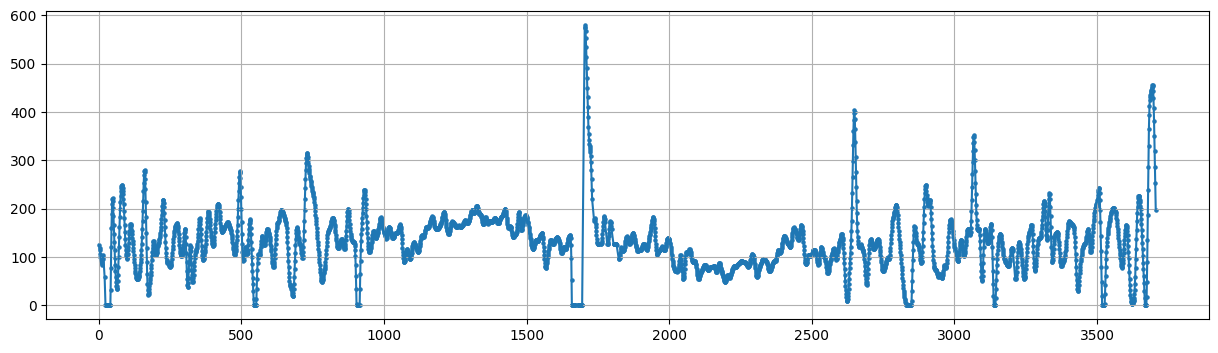

In [14]:
_ = plt.figure(figsize=(15,4))
_ = plt.plot(df_ride1['inst_power'])
_ = plt.scatter(df_ride1.index, df_ride1['inst_power'], s=5)
_ = plt.grid()

In [15]:
def calculate_power_curve(df: pd.DataFrame):
    # Create a set of rolling windows to calculate a MAX over avg(inst_powers[within_window])
    rolling_windows = [4, 5, 10, 20, 30, 60, # seconds
                        2*60, 3*60, 4*60, 5*60, 6*60, 10*60, 20*60, 30*60, 40*60, # minutes
                        60*60, 2*60*60] # hours
    rwindow_labels = ['4s', '5s', '10s', '20s', '30s', '1m', # seconds
                        '2m', '3m', '4m', '5m', '6m', '10m', '20m', '30m', '40m', # minutes
                        '1h', '2h'] # hours
    label_map = {seconds:label for seconds,label in zip(rolling_windows,rwindow_labels)}

    # Initialize a list to store the peak powers per window
    window_peak_powers = []

    for rwindow in rolling_windows:
        # We should not calculate the peak power for a window that is longer than this value since it is ill defined
        rolling_avg_inst_power = df[['inst_power']].rolling(rwindow, min_periods=rwindow).mean().dropna()
        if rolling_avg_inst_power.shape[0]==0: # all values were np.nan, hence the window is too large for the ride data
            peak_power = np.nan
        else:
            peak_power = max(rolling_avg_inst_power.values)[0]
        window_peak_powers.append({'time_window':label_map[rwindow], 'window_length_seconds':rwindow, 'peak_avg_power':peak_power})
    
    # Create and output dictionary that summarizes the best power efforts by duration for this ride
    df_pwr = pd.DataFrame(window_peak_powers)
    output_summary = dict()
    for _, row in df_pwr[['time_window','peak_avg_power']].iterrows():
        output_summary[f'best_power_{row["time_window"]}'] = row['peak_avg_power']
    return output_summary

In [16]:
route_power_curve = calculate_power_curve(df_ride1)
route_power_curve = pd.DataFrame([route_power_curve]).fillna(0.0)

In [17]:
route_power_curve

,best_power_4s,best_power_5s,best_power_10s,best_power_20s,best_power_30s,best_power_1m,best_power_2m,best_power_3m,best_power_4m,best_power_5m,best_power_6m,best_power_10m,best_power_20m,best_power_30m,best_power_40m,best_power_1h,best_power_2h
0,574.243577,569.918569,530.736849,445.722863,378.876074,264.57943,197.095785,179.080437,176.473925,174.257879,172.874195,161.966226,151.354617,144.251509,133.013647,131.106086,0.0


# Comparing Route to Ride Curves

In [18]:
import re
def get_power_column_mapping(power_cols:list[str]) -> dict:
    # Create a mapping from power column names back to axis labels and values
    pattern = r'best_power_([\d]+)([smh])'
    seconds_map = {'s':1, 'm':60, 'h':60*60}
    power_col_map = dict()
    for col in power_cols:
        matched = re.match(pattern, col)
        if matched is not None:
            value, unit = matched.groups()
            power_col_map[col] = {'label':value+unit,'duration':int(value)*seconds_map[unit]}
    return power_col_map

In [19]:
def get_route_power_curve(df_route:pd.DataFrame) -> pd.DataFrame:
    route_power_curve = calculate_power_curve(df_ride1)
    power_cols = ['best_power_4s', 'best_power_5s','best_power_10s', 'best_power_20s', 'best_power_30s', 'best_power_1m',
                    'best_power_2m', 'best_power_3m', 'best_power_4m', 'best_power_5m',
                    'best_power_6m', 'best_power_10m', 'best_power_20m', 'best_power_30m',
                    'best_power_40m', 'best_power_1h', 'best_power_2h']

    # Create a mapping from power column names back to axis labels and values
    power_col_map = get_power_column_mapping(power_cols)

    # For each ride, plot its power curve
    data = [{'duration':power_col_map[col]['duration'], 'duration_label':power_col_map[col]['label'], 'best_power':route_power_curve[col]} for col in power_cols]
    df_route_pwr = pd.DataFrame(data)
    df_route_pwr['duration_label'] = pd.Categorical(df_route_pwr['duration_label'], categories=[x.replace('best_power_','') for x in power_cols], ordered=True)
    df_route_pwr['ride_id']='route'
    df_route_pwr['year']=np.nan
    df_route_pwr['month']=np.nan
    df_route_pwr['month_name']=None
    df_route_pwr = df_route_pwr[['ride_id','year','month','month_name','duration','duration_label','best_power']]

    return df_route_pwr

In [20]:
import re
def get_power_curves(df_summary:pd.DataFrame, ride_id_subset:list[str]=None) -> pd.DataFrame:
    # Subset the df_summary columns and filter for the relevant ride_ids
    cols_of_interest = ['ride_id', 'start_date','year','month','month_name', 'total_distance_mi','total_ascent_ft','avg_power']
    power_cols = ['best_power_4s', 'best_power_5s','best_power_10s', 'best_power_20s', 'best_power_30s', 'best_power_1m',
                    'best_power_2m', 'best_power_3m', 'best_power_4m', 'best_power_5m',
                    'best_power_6m', 'best_power_10m', 'best_power_20m', 'best_power_30m',
                    'best_power_40m', 'best_power_1h', 'best_power_2h']
    cols_of_interest += power_cols
    if ride_id_subset is None: ride_id_subset = df['ride_id'].values # if not specified, all rides will be used
    df_rides = df_summary.copy().loc[df_summary['ride_id'].isin(ride_id_subset), cols_of_interest]

    # Create a mapping from power column names back to axis labels and values
    power_col_map = get_power_column_mapping(power_cols)

    # For each ride, plot its power curve
    df_powers = []
    for _, row in df_rides.iterrows():
        data = [{'duration':power_col_map[col]['duration'], 'duration_label':power_col_map[col]['label'], 'best_power':row[col]} for col in power_cols]
        df_pwr = pd.DataFrame(data)
        df_pwr['duration_label'] = pd.Categorical(df_pwr['duration_label'], categories=[x.replace('best_power_','') for x in power_cols], ordered=True)
        df_pwr['ride_id']=row['ride_id']
        df_pwr['year']=row['year']
        df_pwr['month']=row['month']
        df_pwr['month_name']=row['month_name']
        df_pwr = df_pwr[['ride_id','year','month','month_name','duration','duration_label','best_power']]
        df_powers.append(df_pwr)

    return pd.concat(df_powers, ignore_index=True)

def get_top_cyclists_power_curve() -> pd.DataFrame:
    power_cols = ['best_power_4s', 'best_power_5s','best_power_10s', 'best_power_20s', 'best_power_30s', 'best_power_1m',
                    'best_power_2m', 'best_power_3m', 'best_power_4m', 'best_power_5m',
                    'best_power_6m', 'best_power_10m', 'best_power_20m', 'best_power_30m',
                    'best_power_40m', 'best_power_1h', 'best_power_2h']
    power_col_map = get_power_column_mapping(power_cols)
    # top 1% of cyclists, ref: https://www.cyclinganalytics.com/blog/2018/06/how-does-your-cycling-power-output-compare
    top_cyclist_powers = {'best_power_4s':1650, 'best_power_5s':1500,'best_power_10s':1375, 'best_power_20s':1200, 'best_power_30s':1000, 'best_power_1m':775,
                        'best_power_2m':600, 'best_power_3m':560, 'best_power_4m':535, 'best_power_5m':510,
                        'best_power_6m':500, 'best_power_10m':490, 'best_power_20m':460, 'best_power_30m':420,
                        'best_power_40m':375, 'best_power_1h':360}
    data = [{'duration':power_col_map[col]['duration'], 'best_power':top_cyclist_powers[col]} for col in top_cyclist_powers.keys()]
    df_pwr_top = pd.DataFrame(data)
    return df_pwr_top

In [26]:
def plot_summary_power_curves(df_pwrs:pd.DataFrame, figsize:tuple=(12,4), color_by:str='ride_id', alpha:float=0.5, ylims:list[float]=None,
                              logscale_base:int=10, title:str='Best Ride Efforts Power Curve', show_best_cyclist_curve:bool=True,
                              show_ride_id_labels:bool=False):
    ########################################################################
    # Create the Figure
    fig, ax = plt.subplots(1,1, figsize=figsize)

    # For each ride, plot its power curve
    plot_kwargs = dict(data=df_pwrs, x='duration', y='best_power', ax=ax, alpha=alpha,legend=False, hue=color_by)
    if color_by!='ride_id':
        plot_kwargs['legend']=True
        plot_kwargs['palette']='tab10'
    else:
        if show_ride_id_labels:
            plot_kwargs['legend']=True
    _ = sns.lineplot(**plot_kwargs)
    plot_kwargs['legend']=False # do not record dots in the legend
    _ = sns.scatterplot(**plot_kwargs)
    

    if show_best_cyclist_curve:
        df_pwr_top = get_top_cyclists_power_curve()
        _ = ax.plot(df_pwr_top['duration'],df_pwr_top['best_power'], alpha=0.8, c='red', linestyle='--')
        _ = ax.scatter(df_pwr_top['duration'],df_pwr_top['best_power'],label='Top 99% Cyclist', alpha=0.8, marker='d', c='red', linewidths=2)
        _ = plt.legend(loc='best')
    

    ########################################################################
    # Set the axes up for plotting
    def forward(x):
        return np.log10(x) / np.log10(logscale_base)

    def inverse(x):
        return logscale_base**x
    
    if logscale_base==10:
        _ = ax.set_xscale('log')
    else:
        _ = ax.set_xscale('function', functions=(forward,inverse))
    power_cols = ['best_power_4s', 'best_power_5s','best_power_10s', 'best_power_20s', 'best_power_30s', 'best_power_1m',
                'best_power_2m', 'best_power_3m', 'best_power_4m', 'best_power_5m',
                'best_power_6m', 'best_power_10m', 'best_power_20m', 'best_power_30m',
                'best_power_40m', 'best_power_1h','best_power_2h']
    power_col_map = get_power_column_mapping(power_cols)
    _ = plt.xticks(ticks=[col['duration'] for col in power_col_map.values()], 
                   labels=[col['label'] for col in power_col_map.values()], rotation=45)
    _ = plt.grid()
    _ = ax.set_axisbelow(True)
    _ = plt.xlabel('Effort Time Duration', fontsize=14)
    _ = plt.ylabel('Maximum Effort Power (W)', fontsize=14)
    _ = plt.title(title, fontsize=18)
    _ = plt.legend(bbox_to_anchor=(1.025, 1), loc='upper left')
    _ = plt.tight_layout()
    if ylims is not None:
        _ = plt.ylim(ylims)

In [27]:
df_ride_pwr = get_power_curves(df_summary24, ride_id_subset=[RIDE_ID])
df_route_pwr = get_route_power_curve(df_ride1)
df_compare = pd.concat([df_ride_pwr, df_route_pwr], ignore_index=True)

In [28]:
df_compare

,ride_id,year,month,month_name,duration,duration_label,best_power
0,0x6647e479,2024.0,5.0,May,4,4s,483.336974
1,0x6647e479,2024.0,5.0,May,5,5s,474.137319
2,0x6647e479,2024.0,5.0,May,10,10s,417.844343
3,0x6647e479,2024.0,5.0,May,20,20s,322.169952
4,0x6647e479,2024.0,5.0,May,30,30s,286.297521
5,0x6647e479,2024.0,5.0,May,60,1m,267.139890
6,0x6647e479,2024.0,5.0,May,120,2m,240.650760
7,0x6647e479,2024.0,5.0,May,180,3m,238.074818
8,0x6647e479,2024.0,5.0,May,240,4m,229.369084
9,0x6647e479,2024.0,5.0,May,300,5m,209.055920


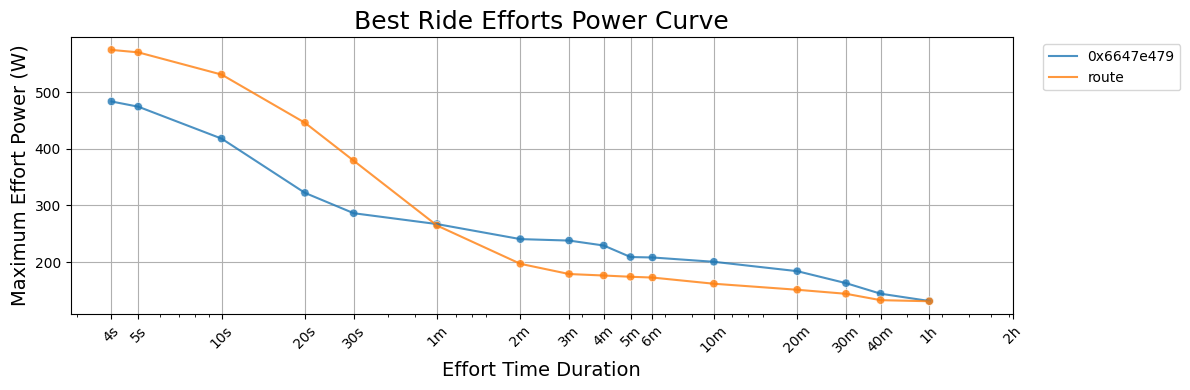

In [30]:
plot_summary_power_curves(df_compare, show_best_cyclist_curve=False, show_ride_id_labels=True, alpha=0.8)